In [3]:
#%matplotlib notebook

import math

import IPython
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.path as mpltPath

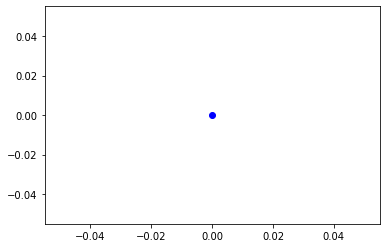

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def animate(i):
    ax.plot(i, i*2, 'bo')

anim = animation.FuncAnimation(fig, animate, interval=500)

In [5]:


from IPython.display import HTML
HTML(anim.to_jshtml())

(-2.0, 18.0)

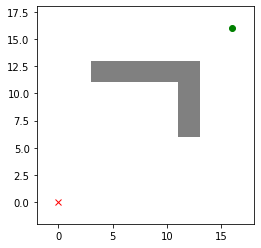

In [6]:
plt.plot(0,0, 'rx', 16,16, 'go')
plt.gca().add_line(plt.Polygon([[3,11],[11,11],[11,6],[13,6],[13,13],[3,13]], facecolor="grey"))
plt.gca().set_aspect('equal')
plt.xlim(-2,18)
plt.ylim(-2,18)

[([0, 0], 22.627416997969522, [[0, 0]])]
target reached!
path ((16, 16), 24.0, [[0, 0], [0, 0], (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 7), (10, 6), (11, 5), (12, 5), (13, 5), (14, 6), (15, 7), (16, 8), (16, 9), (16, 10), (16, 11), (16, 12), (16, 13), (16, 14), (16, 15)])


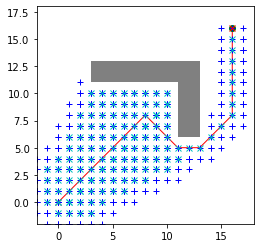

In [104]:
# f(n) = g(n) + h(n)
# g(n) bisherige pfadkosten
# h(n) geschätzte kosten zum ziel

# f(s) = h(s)
# f(z) = g(z)

grid = {
	"dimensions": [
		[-2, -2],
		[18, 18]
	],
	"path": {
		"start": [0,0],
		"target": [16,16]
	},
	"obstacle": [
		[3,11],
		[11,11],
		[11,6],
		[13,6],
		[13,13],
		[3,13],
		[3,11],
	]
}

def obstacle(definition):
    xs, ys = zip(*definition)
    inside = []
    poly = mpltPath.Path(definition+[definition[0]], closed=True)
    for x in range(min(xs), max(xs)+1):
        for y in range(min(ys), max(ys)+1):
    #        plt.plot(x,y, 'yo')
            if poly.contains_point((x,y), radius=0.5):
                    inside.append((x,y))
    #                plt.plot(x,y, 'rx')
    return inside
            

def h(node, target):
    return math.sqrt((node[0]-target[0])**2 + (node[1]-target[1])**2)

def get_neighbours(node):
    neighbours = []
    for x in range(max(-2, node[0]-1), min(node[0]+1, 18)+1):
        for y in range(max(-2, node[1]-1), min(node[1]+1, 18)+1):
            candidate = (x,y)
            if candidate == node:
                continue
            if candidate not in blocked:
                neighbours.append(candidate)
    return neighbours

fig = plt.figure()
ax = fig.add_subplot(1,1,1, aspect="equal", xlim=(-2,18), ylim=(-2,18))

ax.plot(0,0, 'rx', 16,16, 'go')
ax.add_line(plt.Polygon(grid['obstacle'], facecolor="grey"))
#plt.gca().set_aspect('equal')
#plt.xlim(-2,18)
#plt.ylim(-2,18)
blocked = obstacle(grid['obstacle'])

start = grid['path']['start']
target = grid['path']['target']

min_step = None
visited = []
#        min_step = min(list(zip(*front))[1])

def update_front(front, position, target, path=None):
    new_front = []
    if not path:
        path = []
    for node in get_neighbours(position):
        if node in front or node in visited:
            continue
        estimate = h(node, target)
        new_front.append((node, estimate + len(path), path+ [position]))
        if not node == start:
            ax.plot(node[0], node[1], 'b+')
    return new_front

front = [(start, h(start, target),[start])]
#update_front(front, start, target)

#print(front)
    
#for node, distance, path in filter(lambda x:x[1] <= min_step, front):
#    update_front(front, node, target)

def clear_front(front):
    nodes = {}
    for candidate in front:
        position = candidate[0]
        if position in nodes:
            if nodes[position][1] > candidate[1]:
                nodes[position] = candidate
        else:
            nodes[position] = candidate
    return [nodes[pos] for pos in nodes]
            
final_path = []
done = False

def animate(i):
    global front, final_path, done
    if i == 0 or done:
        return
    if len(final_path) > 0 and not done:
        ax.add_line(plt.Polygon(final_path, closed=False, fill=False, edgecolor="r"))
        done = True
        return
    #ax.plot(i/4, i/2, 'bo')
    min_step = min(list(zip(*front))[1])
    new_front = []
    for candidate in filter(lambda x:x[1] <= min_step, front):
        #print(f"{i:<3}", "expand:", candidate, min_step)
        node, distance, path = candidate
        if node[0] == target[0] and node[1] == target[1]:
            new_front = []
            front = []
            final_path = path + [target]
            ax.plot(node[0], node[1], 'rx')
            print("target reached!")
            print("path", candidate)
            break
        for entry in front:
            if node == entry[0]:
                front.remove(entry)
        visited.append(node)
        ax.plot(node[0], node[1], 'cx')
        new_front += update_front(front, node, target, path=path)
    front = clear_front(front + new_front)

print(front)
#list(zip(*front))[1]

"""animate(1)
animate(2)
animate(3)
animate(4)
animate(5)
animate(6)
animate(7)
animate(8)
animate(9)
animate(10)
animate(11)
animate(12)
animate(13)
animate(14)
animate(15)
animate(16)
animate(17)
animate(18)
animate(19)
animate(20)
animate(21)
animate(22)
animate(23)
animate(24)
animate(25)
animate(26)
animate(27)
animate(28)
animate(29)
animate(30)
animate(31)
animate(32)
animate(33)
animate(34)
animate(35)
animate(36)
animate(37)
animate(38)
animate(39)
#front"""


anim = animation.FuncAnimation(fig, animate, interval=50, frames=130, repeat=False)

from IPython.display import HTML
HTML(anim.to_jshtml())
